# Лабораторная работа №1
## по дисциплине "Системы искусственного интеллекта"

Лабораторная работа посвящена работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib.
Для выполнения работы вам был предоставлен набор данных, содержащий информацию об атлетах, принявших участие в Летних Олимпийских играх 2024 в Париже.
Описание каждой колоноки в наборе данных приведено дальше.

code - код спортсмена;

name - полное имя спортсмена;

name_short - сокращенное имя;

name_tv - имя, отображаемое в эфире;

gender - пол спортсмена;

function - роль на олимпиаде;

country_code - код страны;

country - название страны;

country_full - полное название страны;

nationality - сокращенная национальность спортсмена;

nationality_full - полная национальность;

nationality_code - код национальности;

height - рост;

weight - вес;

disciplines - дисциплины, в которых принимает участие спортсмен;

events - состязания, в которых участвует спортсмен;

birth_date - дата рождения спортсмена.


Импортируйте необходимые библиотеки.

Загрузите набор данных из csv-файла. Выведите информацию обо всех колонках, количестве данных в наборе и их статистических показателях (среднее, медиана и т.д.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('athletes_new.csv')
df.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              11115 non-null  int64  
 1   name              11115 non-null  object 
 2   name_short        11115 non-null  object 
 3   name_tv           11115 non-null  object 
 4   gender            11115 non-null  object 
 5   function          11115 non-null  object 
 6   country_code      11115 non-null  object 
 7   country           11115 non-null  object 
 8   country_full      11115 non-null  object 
 9   nationality       11115 non-null  object 
 10  nationality_full  11115 non-null  object 
 11  nationality_code  11115 non-null  object 
 12  height            11115 non-null  int64  
 13  weight            11099 non-null  float64
 14  disciplines       11115 non-null  object 
 15  events            11115 non-null  object 
 16  birth_date        11115 non-null  object

In [4]:
df.shape

(11115, 17)

In [5]:
df.describe()

,code,height,weight
count,1.111500e+04,11115.000000,11099.000000
mean,1.887426e+06,81.835178,2.213713
std,3.587687e+05,89.504711,13.114771
min,1.532872e+06,0.000000,0.000000
25%,1.888186e+06,0.000000,0.000000
50%,1.918842e+06,0.000000,0.000000
75%,1.948950e+06,177.000000,0.000000
max,9.460001e+06,222.000000,113.000000


Проверьте наличие пропусков в данных и заполните их, выбрав стратегию работы с пропусками.

In [6]:
df.isna().sum()

code                 0
name                 0
name_short           0
name_tv              0
gender               0
function             0
country_code         0
country              0
country_full         0
nationality          0
nationality_full     0
nationality_code     0
height               0
weight              16
disciplines          0
events               0
birth_date           0
dtype: int64

In [7]:
df_new = df[(df['weight'] != 0) & (df['height'] != 0)]

In [8]:
df_new.shape

(327, 17)

In [9]:
df_new[df_new['weight'].isna()].head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
457,1566088,TUGSUZ Eda,TUGSUZ E,Eda TUGSUZ,Female,Athlete,TUR,Türkiye,Türkiye,0,0,0,173,NaN,['Athletics'],"[""Women's Javelin Throw""]",1997-03-27
537,1571545,LEVCHENKO Yuliia,LEVCHENKO Y,Yuliia LEVCHENKO,Female,Athlete,UKR,Ukraine,Ukraine,0,0,0,179,NaN,['Athletics'],"[""Women's High Jump""]",1997-11-28
684,1892137,OGRODNIKOVA Nikola,OGRODNIKOVA N,Nikola OGRODNIKOVA,Female,Athlete,CZE,Czechia,Czechia,0,0,0,171,NaN,['Athletics'],"[""Women's Javelin Throw""]",1990-08-18
1271,1922750,JASIUNAITE Liveta,JASIUNAITE L,Liveta JASIUNAITE,Female,Athlete,LTU,Lithuania,Lithuania,0,0,0,173,NaN,['Athletics'],"[""Women's Javelin Throw""]",1994-07-26
2352,1939961,MANSFIELD Lauren,MANSFIELD L,Lauren MANSFIELD,Female,Athlete,AUS,Australia,Australia,0,0,0,170,NaN,['3x3 Basketball'],['Women'],1989-12-18


In [10]:
imputer = KNNImputer(n_neighbors=2)
df_new['weight'] = imputer.fit_transform(df_new[['weight']])
df_new['weight'] = df_new['weight'].astype(int)

C:\Users\Артём\AppData\Local\Temp\ipykernel_10112\3917249236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['weight'] = imputer.fit_transform(df_new[['weight']])
C:\Users\Артём\AppData\Local\Temp\ipykernel_10112\3917249236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['weight'] = df_new['weight'].astype(int)


In [11]:
df_new

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
457,1566088,TUGSUZ Eda,TUGSUZ E,Eda TUGSUZ,Female,Athlete,TUR,Türkiye,Türkiye,0,0,0,173,77,['Athletics'],"[""Women's Javelin Throw""]",1997-03-27
537,1571545,LEVCHENKO Yuliia,LEVCHENKO Y,Yuliia LEVCHENKO,Female,Athlete,UKR,Ukraine,Ukraine,0,0,0,179,77,['Athletics'],"[""Women's High Jump""]",1997-11-28
684,1892137,OGRODNIKOVA Nikola,OGRODNIKOVA N,Nikola OGRODNIKOVA,Female,Athlete,CZE,Czechia,Czechia,0,0,0,171,77,['Athletics'],"[""Women's Javelin Throw""]",1990-08-18
1271,1922750,JASIUNAITE Liveta,JASIUNAITE L,Liveta JASIUNAITE,Female,Athlete,LTU,Lithuania,Lithuania,0,0,0,173,77,['Athletics'],"[""Women's Javelin Throw""]",1994-07-26
2352,1939961,MANSFIELD Lauren,MANSFIELD L,Lauren MANSFIELD,Female,Athlete,AUS,Australia,Australia,0,0,0,170,77,['3x3 Basketball'],['Women'],1989-12-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,3538850,KELLY Jack,KELLY J,Jack KELLY,Male,Athlete,IRL,Ireland,Ireland,Ireland,Ireland,IRL,185,86,['Rugby Sevens'],['Men'],1997-10-26
7643,3538856,KEENAN Hugo,KEENAN H,Hugo KEENAN,Male,Athlete,IRL,Ireland,Ireland,Ireland,Ireland,IRL,185,88,['Rugby Sevens'],['Men'],1996-06-18
7644,3555841,LEUTA Matai,LEUTA M,Matai LEUTA,Male,Athlete,USA,United States,United States of America,United States,United States of America,USA,189,106,['Rugby Sevens'],['Men'],1990-07-20
9553,1966948,HAASE Robin,HAASE R,Robin HAASE,Male,Athlete,NED,Netherlands,Netherlands,0,0,0,191,77,['Tennis'],"[""Men's Doubles"", ""Men's Singles""]",1987-04-06


Удалите колонки code, name_short, name_tv

In [12]:
df_new = df_new.drop(columns=['code', 'name_short', 'name_tv'])

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 457 to 10341
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              327 non-null    object
 1   gender            327 non-null    object
 2   function          327 non-null    object
 3   country_code      327 non-null    object
 4   country           327 non-null    object
 5   country_full      327 non-null    object
 6   nationality       327 non-null    object
 7   nationality_full  327 non-null    object
 8   nationality_code  327 non-null    object
 9   height            327 non-null    int64 
 10  weight            327 non-null    int64 
 11  disciplines       327 non-null    object
 12  events            327 non-null    object
 13  birth_date        327 non-null    object
dtypes: int64(2), object(12)
memory usage: 38.3+ KB


Из какой страны было больше всего атлетов? Сколько их было?

In [14]:
df_new[df_new['function'] == 'Athlete']['country'].value_counts().head(1)

country
Ireland    28
Name: count, dtype: int64

Найдите 15 стран, из которых было больше всего спортсменов. Постройте гистограмму, где по горизонтальной оси будет отображаться код страны, а по вертикальной - количество спортсменов.

In [15]:
top_countries = df_new['country_code'].value_counts().head(15)

In [16]:
top_countries

country_code
IRL    28
FIJ    26
AUS    26
JPN    26
RSA    26
USA    26
FRA    25
NZL    25
GBR    15
CAN    14
BRA    14
CHN    14
URU    14
ARG    14
KEN    13
Name: count, dtype: int64

In [17]:
top_countries.values

array([28, 26, 26, 26, 26, 26, 25, 25, 15, 14, 14, 14, 14, 14, 13])

<Axes: xlabel='country_code', ylabel='count'>

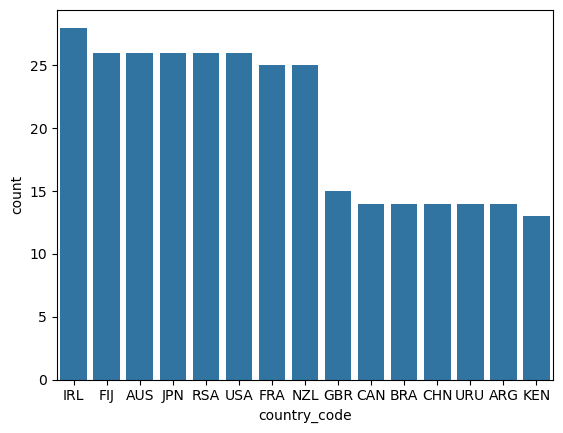

In [18]:
sns.barplot(x = top_countries.index, y = top_countries)

Сколько женщин и мужчин участвовало в Олимпиаде?

In [19]:
df_new['gender'].value_counts()

gender
Female    164
Male      163
Name: count, dtype: int64

Выведите количество женщин, которые участвовали только в одной соревновательной группе (колонка events).

In [20]:
df_new['events'] = df_new['events'].apply(lambda x: ast.literal_eval(x))

In [21]:
df_new['n_events'] = df_new['events'].apply(len)

In [22]:
df_new.head()

,name,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date,n_events
457,TUGSUZ Eda,Female,Athlete,TUR,Türkiye,Türkiye,0,0,0,173,77,['Athletics'],[Women's Javelin Throw],1997-03-27,1
537,LEVCHENKO Yuliia,Female,Athlete,UKR,Ukraine,Ukraine,0,0,0,179,77,['Athletics'],[Women's High Jump],1997-11-28,1
684,OGRODNIKOVA Nikola,Female,Athlete,CZE,Czechia,Czechia,0,0,0,171,77,['Athletics'],[Women's Javelin Throw],1990-08-18,1
1271,JASIUNAITE Liveta,Female,Athlete,LTU,Lithuania,Lithuania,0,0,0,173,77,['Athletics'],[Women's Javelin Throw],1994-07-26,1
2352,MANSFIELD Lauren,Female,Athlete,AUS,Australia,Australia,0,0,0,170,77,['3x3 Basketball'],[Women],1989-12-18,1


In [24]:
df_new[(df_new['gender'] == 'Female') & (df_new['n_events'] == 1)].shape[0]

164

Выведите количество спортсменов, у которых национальность не совпадает со страной, за которую они выступают.

In [ ]:
df_new[df_new['nationality_code'] != df_new['country_code']].shape[0]

11

Какой процент мужчин моложе 23 участвовало в этой Олимпиаде?

In [25]:
df_new['birth_date'] = pd.to_datetime(df_new['birth_date'])
df_new['birth_date']

457     1997-03-27
537     1997-11-28
684     1990-08-18
1271    1994-07-26
2352    1989-12-18
           ...    
7642    1997-10-26
7643    1996-06-18
7644    1990-07-20
9553    1987-04-06
10341   1990-06-01
Name: birth_date, Length: 327, dtype: datetime64[ns]

In [26]:
df_new['years'] = ((pd.to_datetime('2024-07-26') - df_new['birth_date']).dt.days / 365).astype(int)

In [27]:
df_new

,name,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date,n_events,years
457,TUGSUZ Eda,Female,Athlete,TUR,Türkiye,Türkiye,0,0,0,173,77,['Athletics'],[Women's Javelin Throw],1997-03-27,1,27
537,LEVCHENKO Yuliia,Female,Athlete,UKR,Ukraine,Ukraine,0,0,0,179,77,['Athletics'],[Women's High Jump],1997-11-28,1,26
684,OGRODNIKOVA Nikola,Female,Athlete,CZE,Czechia,Czechia,0,0,0,171,77,['Athletics'],[Women's Javelin Throw],1990-08-18,1,33
1271,JASIUNAITE Liveta,Female,Athlete,LTU,Lithuania,Lithuania,0,0,0,173,77,['Athletics'],[Women's Javelin Throw],1994-07-26,1,30
2352,MANSFIELD Lauren,Female,Athlete,AUS,Australia,Australia,0,0,0,170,77,['3x3 Basketball'],[Women],1989-12-18,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,KELLY Jack,Male,Athlete,IRL,Ireland,Ireland,Ireland,Ireland,IRL,185,86,['Rugby Sevens'],[Men],1997-10-26,1,26
7643,KEENAN Hugo,Male,Athlete,IRL,Ireland,Ireland,Ireland,Ireland,IRL,185,88,['Rugby Sevens'],[Men],1996-06-18,1,28
7644,LEUTA Matai,Male,Athlete,USA,United States,United States of America,United States,United States of America,USA,189,106,['Rugby Sevens'],[Men],1990-07-20,1,34
9553,HAASE Robin,Male,Athlete,NED,Netherlands,Netherlands,0,0,0,191,77,['Tennis'],"[Men's Doubles, Men's Singles]",1987-04-06,2,37


In [28]:
float(round(((((df_new['years'] < 23) & (df_new['gender'] == 'Male')).sum()) / (df_new['gender'] == 'Male').sum()) * 100, 2))

12.88

Постройте график зависимости роста от веса у женщин (scatter plot).

In [29]:
df_new

,name,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date,n_events,years
457,TUGSUZ Eda,Female,Athlete,TUR,Türkiye,Türkiye,0,0,0,173,77,['Athletics'],[Women's Javelin Throw],1997-03-27,1,27
537,LEVCHENKO Yuliia,Female,Athlete,UKR,Ukraine,Ukraine,0,0,0,179,77,['Athletics'],[Women's High Jump],1997-11-28,1,26
684,OGRODNIKOVA Nikola,Female,Athlete,CZE,Czechia,Czechia,0,0,0,171,77,['Athletics'],[Women's Javelin Throw],1990-08-18,1,33
1271,JASIUNAITE Liveta,Female,Athlete,LTU,Lithuania,Lithuania,0,0,0,173,77,['Athletics'],[Women's Javelin Throw],1994-07-26,1,30
2352,MANSFIELD Lauren,Female,Athlete,AUS,Australia,Australia,0,0,0,170,77,['3x3 Basketball'],[Women],1989-12-18,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,KELLY Jack,Male,Athlete,IRL,Ireland,Ireland,Ireland,Ireland,IRL,185,86,['Rugby Sevens'],[Men],1997-10-26,1,26
7643,KEENAN Hugo,Male,Athlete,IRL,Ireland,Ireland,Ireland,Ireland,IRL,185,88,['Rugby Sevens'],[Men],1996-06-18,1,28
7644,LEUTA Matai,Male,Athlete,USA,United States,United States of America,United States,United States of America,USA,189,106,['Rugby Sevens'],[Men],1990-07-20,1,34
9553,HAASE Robin,Male,Athlete,NED,Netherlands,Netherlands,0,0,0,191,77,['Tennis'],"[Men's Doubles, Men's Singles]",1987-04-06,2,37


<Axes: xlabel='weight', ylabel='height'>

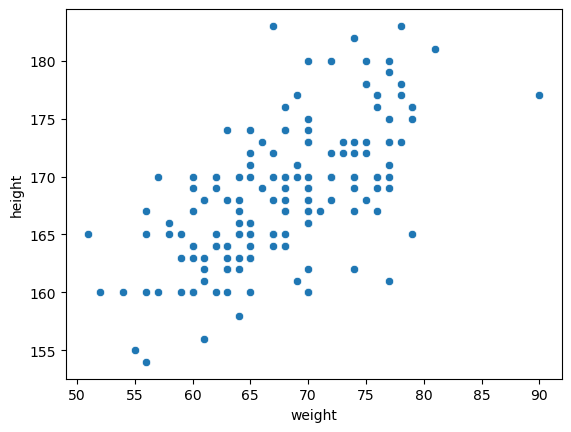

In [30]:
sns.scatterplot(x=df_new[df_new['gender'] == 'Female']['weight'], y=df_new[df_new['gender'] == 'Female']['height'])

Постройте график распределения, где по оси X будет показан возраст, а по оси Y - процент спортсменов этого возраста, принявших участие в Олимпиаде для женщин и мужчин на одном графике.

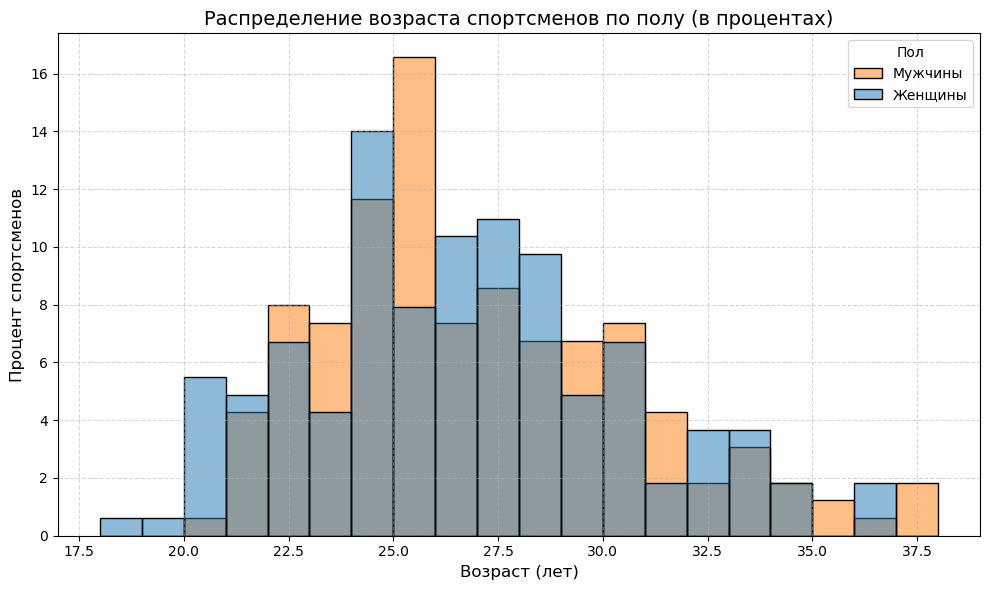

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_new,
    x="years",
    hue="gender",
    stat="percent",
    multiple="layer",
    common_norm=False,
    bins=range(df_new["years"].min(), df_new["years"].max() + 1)
)

plt.title("Распределение возраста спортсменов по полу (в процентах)", fontsize=14)
plt.xlabel("Возраст (лет)", fontsize=12)
plt.ylabel("Процент спортсменов", fontsize=12)
plt.legend(title="Пол", labels=["Мужчины", "Женщины"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Постройте круговую диаграмму, чтобы отобразить долю спортсменов по пяти странам с наибольшим количеством участников.

In [33]:
top = top_countries.head(5)

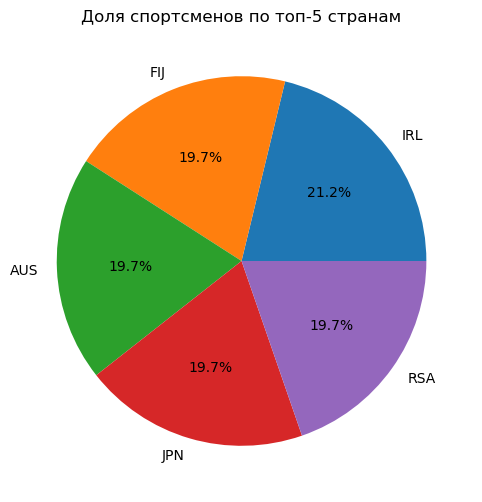

In [34]:
top.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 6),
    ylabel='',
    title='Доля спортсменов по топ-5 странам',
)
plt.show()